In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv('Crop Production data.csv')
print(data.head())

                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0  


In [4]:
print(data.isnull().sum())

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64


In [5]:
data = data.dropna()

In [6]:
print(data.isnull().sum())

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64


In [7]:
print(data.dtypes)

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object


In [8]:
# Summary statistics
print(data.describe())

           Crop_Year          Area    Production
count  242361.000000  2.423610e+05  2.423610e+05
mean     2005.625773  1.216741e+04  5.825034e+05
std         4.958285  5.085744e+04  1.706581e+07
min      1997.000000  1.000000e-01  0.000000e+00
25%      2002.000000  8.700000e+01  8.800000e+01
50%      2006.000000  6.030000e+02  7.290000e+02
75%      2010.000000  4.545000e+03  7.023000e+03
max      2015.000000  8.580100e+06  1.250800e+09


C:\Users\venna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\venna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Production')

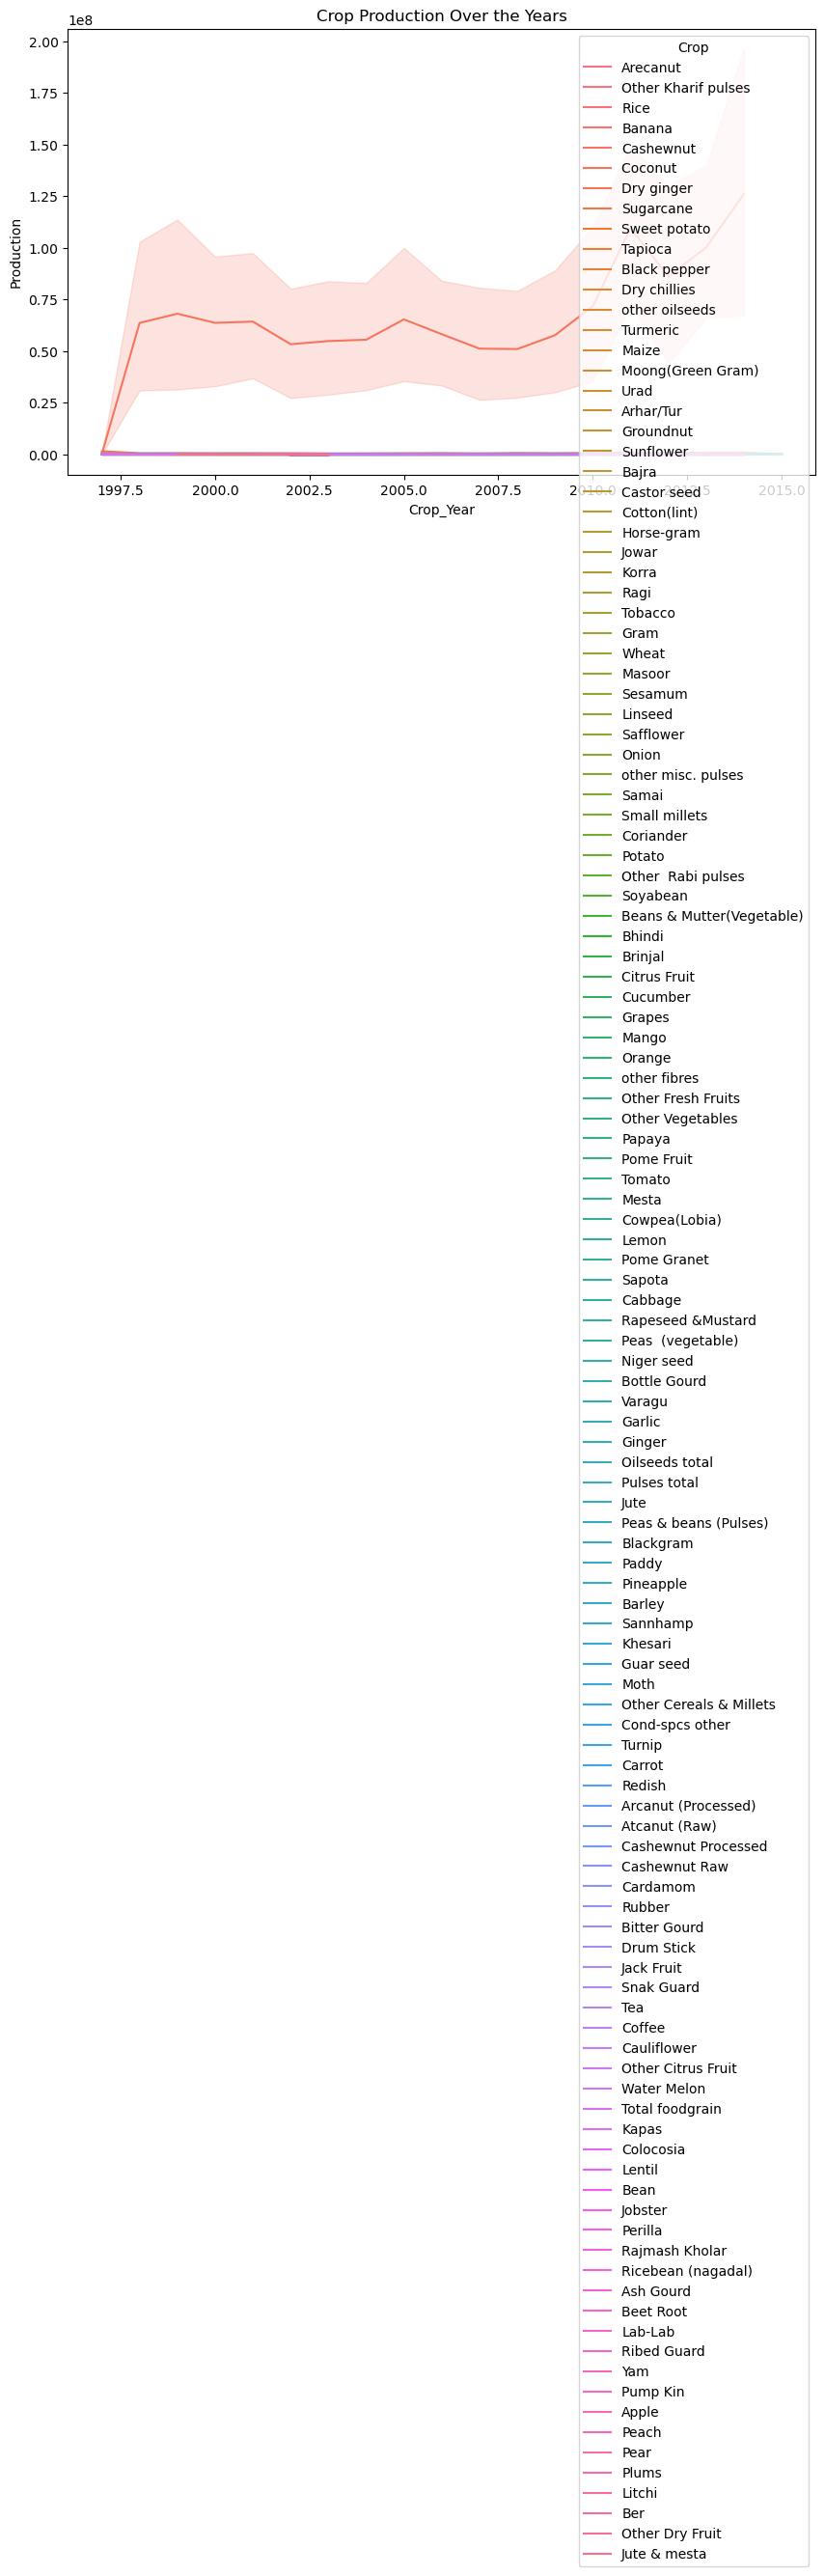

In [12]:
#crop production over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Crop_Year', y='Production', hue='Crop', data=data)
plt.title('Crop Production Over the Years')
plt.xlabel('Crop_Year')
plt.ylabel('Production')

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123]),
 [Text(0, 0, 'Arecanut'),
  Text(1, 0, 'Other Kharif pulses'),
  Text(2, 0, 'Rice'),
  Text(3, 0, 'Banana'),
  Text(4, 0, 'Cashewnut'),
  Text(5, 0, 'Coconut '),
  Text(6, 0, 'Dry ginger'),
  Text(7, 0, 'Sugarcane'),
  Text(8, 0, 'Sweet potato'),
  Text(9, 0, 'Tapioca'),
  Text(10, 0, 'Black peppe

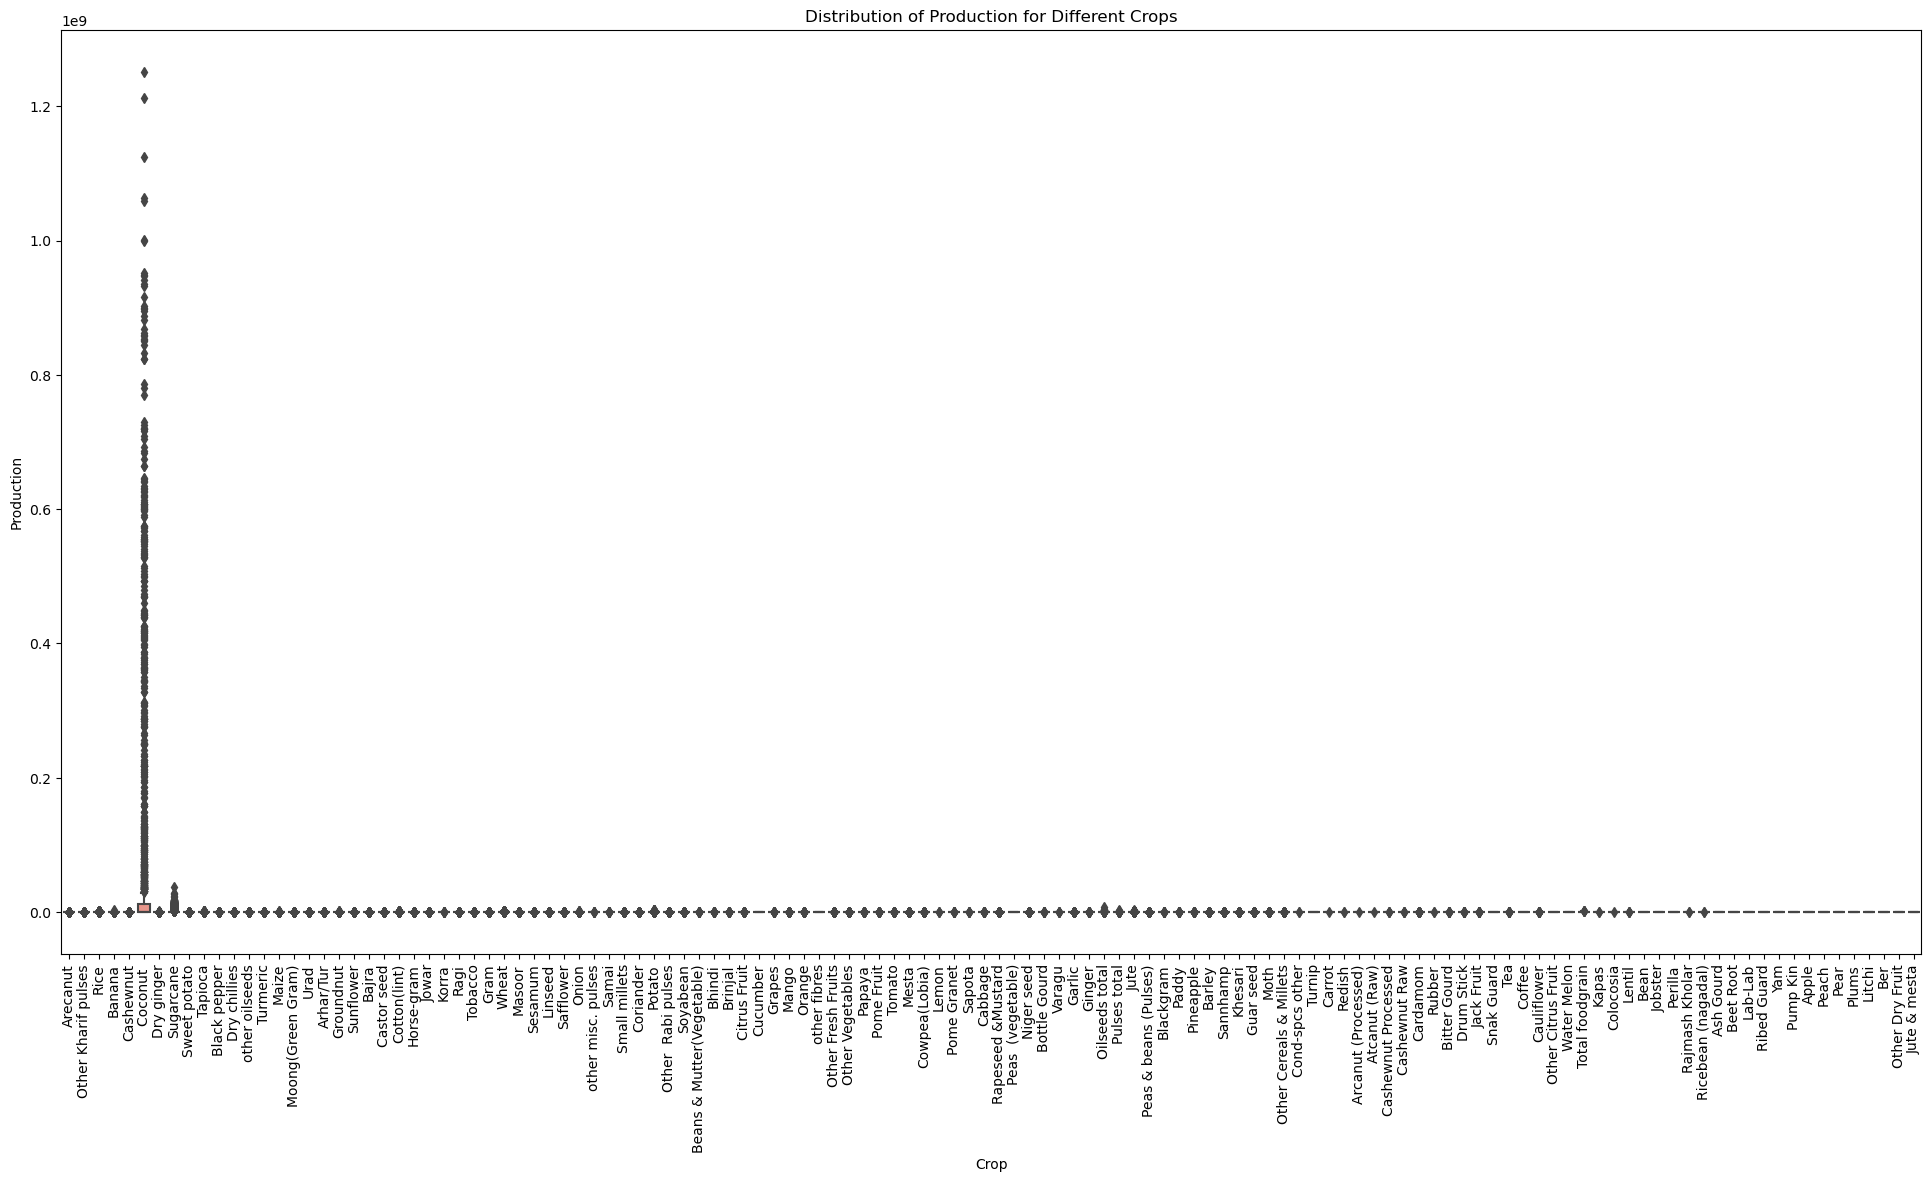

In [15]:
# distribution of production for different crops
plt.figure(figsize=(24, 12))
sns.boxplot(x='Crop', y='Production', data=data)
plt.title('Distribution of Production for Different Crops')
plt.xlabel('Crop')
plt.ylabel('Production')
plt.xticks(rotation=90)

In [17]:
X = data[['Crop_Year']]
y = data['Production']

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# predictions
y_pred = model.predict(X_test)


In [22]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 402344270026105.2


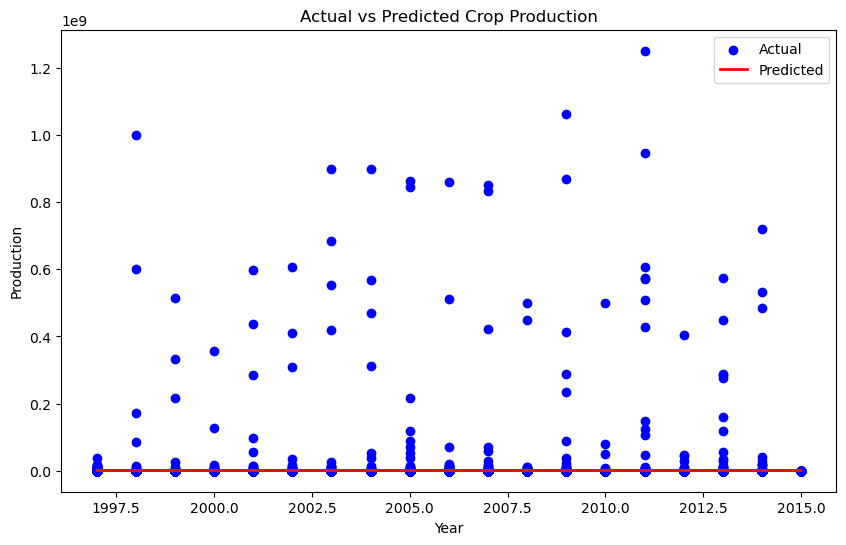

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Actual vs Predicted Crop Production')
plt.xlabel('Year')
plt.ylabel('Production')
plt.legend()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Kerala'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Tamil Nadu'),
  Text(3, 0, 'Uttar Pradesh'),
  Text(4, 0, 'Assam'),
  Text(5, 0, 'West Bengal'),
  Text(6, 0, 'Maharashtra'),
  Text(7, 0, 'Karnataka'),
  Text(8, 0, 'Andaman and Nicobar Islands'),
  Text(9, 0, 'Punjab'),
  Text(10, 0, 'Gujarat'),
  Text(11, 0, 'Goa'),
  Text(12, 0, 'Madhya Pradesh'),
  Text(13, 0, 'Puducherry'),
  Text(14, 0, 'Haryana'),
  Text(15, 0, 'Bihar'),
  Text(16, 0, 'Telangana '),
  Text(17, 0, 'Rajasthan'),
  Text(18, 0, 'Odisha'),
  Text(19, 0, 'Uttarakhand'),
  Text(20, 0, 'Chhattisgarh'),
  Text(21, 0, 'Himachal Pradesh'),
  Text(22, 0, 'Jammu and Kashmir '),
  Text(23, 0, 'Nagaland'),
  Text(24, 0, 'Tripura'),
  Text(25, 0, 'Meghalaya'),
  Text(26, 0, 'Jharkhand'),
  Text(27, 0, 'Arunachal Pradesh'),
  Text(28, 0, 'Manipur'),
  Text(29, 0

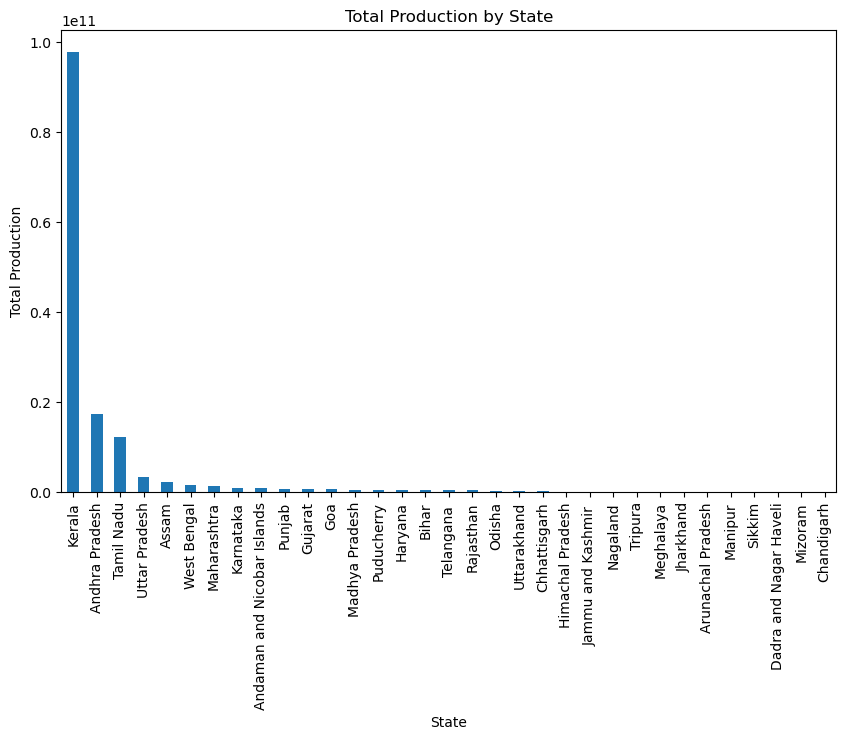

In [24]:
# Total production by state
state_production = data.groupby('State_Name')['Production'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
state_production.plot(kind='bar')
plt.title('Total Production by State')
plt.xlabel('State')
plt.ylabel('Total Production')
plt.xticks(rotation=90)

C:\Users\venna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\venna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Production')

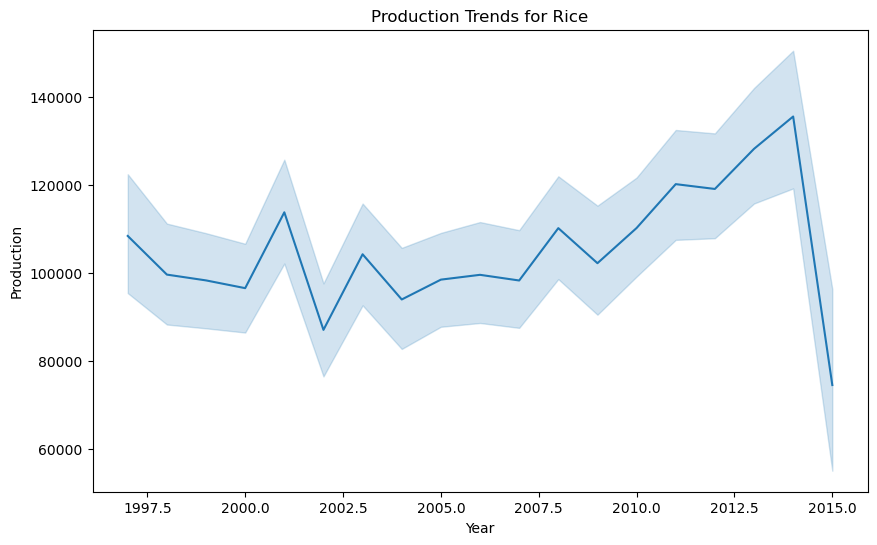

In [26]:
# Production trends for a specific crop
specific_crop = 'Rice'
crop_data = data[data['Crop'] == specific_crop]

plt.figure(figsize=(10, 6))
sns.lineplot(x='Crop_Year', y='Production', data=crop_data)
plt.title(f'Production Trends for {specific_crop}')
plt.xlabel('Year')
plt.ylabel('Production')